`
Date:       22-02-2021
Params:      R0.7-1.0B13ATP2000MD2000S273T5.0
About:       Speed, binding myosins, binding ratio, kd=kd0 (supressed load-dependence)
Version:     v11n
Data source: /media/nitta/HDCZ-UT/NITTA-LAB HD3/Sam/V11n/dt1.0s5/SEED273MD2000 
             /media/nitta/HDCZ-UT/NITTA-LAB HD3/Sam/V11n/l985_kd_is_kd0/Ts0.01
By:          Sam Macharia
`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

cm = 1/2.54

#from scipy.interpolate import spline
# jupyter nbconvert xxx.ipynb --no-input

In [2]:
Laf = 3 # um
r = 0.95 # um (active ratio)
md = 3000 # um^-2
ka = 40 # sec^-1
k = 300 # pN/um
Fd = 9.2 # pN
v = 4 # um/s
w1 = Fd/k # 0.02 # um # 2w
w2 = 0.02

In [3]:
s_kd0 = pd.read_csv('dataDt1s5/v11Nspd_std273s5kd0.csv', names=['spd','std'])
ac_def_kd0 =pd.read_csv('dataDt1s5/v11Nmtrs_std273s5kd0.csv', names=['spec1','dev1','spec2','dev2'])
r_kd0 = np.array([0.7,0.8,0.9,0.92,0.94,0.96, 1.00])

# S273MD2000
s_273 = pd.read_csv('dataDt1s5/v11Nspd_std273s5.csv', names=['spd','std']) # NB: speed for R1.0 was calculated from TS=200 due to a previous brief detach
ac_def_273 =pd.read_csv('dataDt1s5/v11Nmtrs_std273s5.csv', names=['spec1','dev1','spec2','dev2'])
r_273 = np.array([0.70,0.80,0.90,0.92,0.94,0.96,0.98,1.0])

s_77 = pd.read_csv('dataDt1s5/v11nspd_std77t5.csv', names=['spd','std']) 
ac_def_77 =pd.read_csv('dataDt1s5/v11nmtrs_s77t5.csv', names=['spec1','dev1','spec2','dev2'])
r_77 = np.array([0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0])

s_pN = pd.read_csv('dataDt1s5/v11nspd_std77t5F4.6pN.csv', names=['spd','std']) 
ac_def_pN =pd.read_csv('dataDt1s5/v11nmtrs_s77t5F4.6pN.csv', names=['spec1','dev1','spec2','dev2'])
r_pN = np.array([0.2,0.5,0.70,0.80,0.90,0.98])

s_ATP500 = pd.read_csv('dataDt1s5/v11nspd_std77t5ATP500.csv', names=['spd','std'])
ac_def_ATP500 =pd.read_csv('dataDt1s5/v11nmtrs_s77t5ATP500.csv', names=['spec1','dev1','spec2','dev2'])
r_ATP500 = np.array([0.70,0.80,0.82,0.84,0.88,0.90,0.92,0.94,0.96,0.98,1.00])

#MD 2000, Oh, same as above s_273...?
s = pd.read_csv('dataDt1s5/v11Nspd_std273s5.csv', names=['spd','std']) 
s2 = pd.read_csv('dataDt1s5/v11Nspd_std273s5b2.csv', names=['spd','std'])
ac_def=pd.read_csv('dataDt1s5/v11Nmtrs_std273s5.csv', names=['spec1','dev1','spec2','dev2'])
ac_def2=pd.read_csv('dataDt1s5/v11Nmtrs_std273s5b2.csv', names=['spec1','dev1','spec2','dev2'])
r = np.array([0.7,0.8,0.9,0.92,0.94,0.96,0.98,1.0])

#12-05-2021
ac_def_77_46pN =pd.read_csv('data_12-05/mtrs_std77s5F4.6pN_cleaned.csv', names=['spec1','dev1','spec2','dev2'])
r_77_46pN = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) # ,0.42,0.44,0.46,0.48 not used

ac_def_77_69pN =pd.read_csv('data_12-05/mtrs_std77s5F6.9pN.csv', names=['spec1','dev1','spec2','dev2'])
r_77_69pN = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

ac_def_77_92pN =pd.read_csv('data_12-05/mtrs_std77s5F9.2pN_combined.csv', names=['spec1','dev1','spec2','dev2'])
r_77_92pN = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [4]:
bm_es_def_ = [] #; v = s[0]['spd'][0] # -- dt = 0.2
bm_es_def = []
bm_es_def_2 = []
bm_es_def2 = []
ratio = [0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0]

md = 3000

for i in range(len(ratio)): # i -- motor ratio
    bm_def=(Fd / (Fd+((k*(s_77['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w1
    bm_def2=(Fd / (Fd+((k*(s_77['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w2
    bm_es_def_.append(bm_def)
    bm_es_def_2.append(bm_def2)
bm_es_def.append(bm_es_def_)
bm_es_def2.append(bm_es_def_2)
bm_es_def_ = []; bm_es_def_2 = []

dfw1 = np.array(bm_es_def); dfw1 = dfw1.flatten()
dfw2 = np.array(bm_es_def2); dfw2 = dfw2.flatten()

In [5]:
bm_es_def_ = [] #; v = s[0]['spd'][0] # -- dt = 0.2
bm_es_def = []
bm_es_def_2 = []
bm_es_def2 = []
ratio = [0.70,0.80,0.90,0.92,0.94,0.96,0.98,1.0]

md = 2000

for i in range(len(ratio)): # i -- motor ratio
    bm_def=(Fd / (Fd+((k*(s_273['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w1
    bm_def2=(Fd / (Fd+((k*(s_273['spd'][i]))/ka)) )*(1-ratio[i])*md*Laf*2*w2
    bm_es_def_.append(bm_def)
    bm_es_def_2.append(bm_def2)
bm_es_def.append(bm_es_def_)
bm_es_def2.append(bm_es_def_2)
bm_es_def_ = []; bm_es_def_2 = []

dfw1_MD2000 = np.array(bm_es_def); dfw1_MD2000 = dfw1_MD2000.flatten()
dfw2_MD2000 = np.array(bm_es_def2); dfw2_MD2000 = dfw2_MD2000.flatten()

In [6]:
bm_es_act_ = [] #; v = s[0]['spd'][0] # -- dt = 0.2
bm_es_act = []
bm_es_act_2 = []
bm_es_act2 = []
ratio = [0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0]

for i in range(len(ratio)): # i -- motor ratio
    bm_act=(Fd / (Fd+((k*(s_77['spd'][i]))/ka)))*(ratio[i])*md*Laf*2*w1 # ka / (Fd/(k*s['spd'][i]))+ka 
    bm_act2=(Fd / (Fd+((k*(s_77['spd'][i]))/ka)))*(ratio[i])*md*Laf*2*w1 # 0.006
    bm_es_act_.append(bm_act)
    bm_es_act_2.append(bm_act2)
bm_es_act.append(bm_es_act_)
bm_es_act2.append(bm_es_act_2)
bm_es_act_ = []; bm_es_act_2 = []

acw1 = np.array(bm_es_act); acw1 = acw1.flatten()
acw2 = np.array(bm_es_act2); acw2 = acw2.flatten()

$kd=kd0\ For\ actin\ filament\ made\ up\ of\ 13\ beads\ with\ 0.25\mu m\ rod\ bondlength:$ 

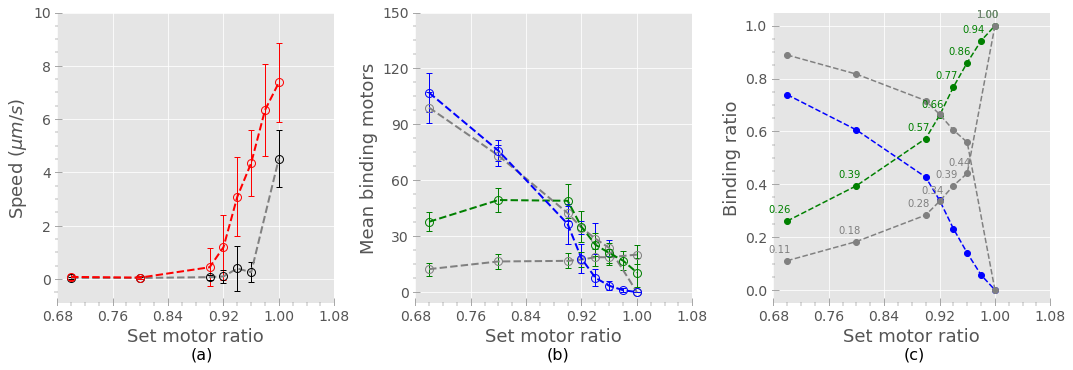

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].errorbar(r_kd0,s_kd0['spd'],s_kd0['std'], capsize=3, linestyle='--', lw=2, color = 'gray', mec = 'black', marker='o',\
             markersize=8, markerfacecolor='none', ecolor='black', elinewidth=1, label='v11a')
ax[0].errorbar(r,s['spd'],s['std'], capsize=3, linestyle='--', lw=2, color = 'red', mec = 'red', marker='o',\
             markersize=8, markerfacecolor='none', ecolor='red', elinewidth=1, label='v11a')

#ax[0].fill_between(r,(s['spd']-s['std']),(s['spd']+s['std']), alpha=0.4, edgecolor='black', facecolor='#FF9848')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['bottom'].set_position(('axes',-0.01))
ax[0].spines['left'].set_position(('axes',-0.01))
ax[0].spines['left'].set_bounds(0,10)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

ax[0].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[0].set_yticks(np.arange(0,10.3,2.0))

ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[0].set_xlabel('Set motor ratio', fontsize=18)
ax[0].set_ylabel('Speed ($\mu m/s$)', fontsize= 18)


#for x,y in zip(r,s['spd']):
#    label = "{:.1f}".format(y)
#    ax[0].annotate(label,(x,y),textcoords="offset points",xytext=(5,7),ha='right', color='blue')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples


ax[1].errorbar(r_kd0,ac_def_kd0['spec1'],ac_def_kd0['dev1'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='gray', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax[1].errorbar(r_kd0,ac_def_kd0['spec2'],ac_def_kd0['dev2'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='gray', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')

ax[1].errorbar(r,ac_def['spec1'],ac_def['dev1'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='green', marker='o', markersize=8, markerfacecolor='none', ecolor='green', label='Active')
ax[1].errorbar(r,ac_def['spec2'],ac_def['dev2'], capsize=3, linestyle='--', linewidth=2, elinewidth=1, color='blue', marker='o', markersize=8, markerfacecolor='none', ecolor='blue', label='Defective')
#ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax[1].plot(r,dfw1, marker='o', markerfacecolor='salmon', ls='--', color='black', label='Def. F/k') # gray

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].spines['bottom'].set_position(('axes',-0.01))
ax[1].spines['left'].set_position(('axes',-0.01))
ax[1].spines['left'].set_bounds(0,150)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[1].set_yticks(np.arange(0,151,30))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[1].set_xlabel('Set motor ratio', fontsize=18)
ax[1].set_ylabel('Mean binding motors', fontsize=18)
#================================================================================

act_r = ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2'])
def_r = ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2'])

act_r_kd0 = ac_def_kd0['spec1']/(ac_def_kd0['spec1'] + ac_def_kd0['spec2'])
def_r_kd0 = ac_def_kd0['spec2']/(ac_def_kd0['spec1'] + ac_def_kd0['spec2'])

ax[2].plot(r,act_r, marker='o', linestyle='--', color = 'green')
ax[2].plot(r,def_r, marker='o', linestyle='--', color = 'blue')

ax[2].plot(r_kd0,act_r_kd0, marker='o', linestyle='--', color = 'gray')
ax[2].plot(r_kd0,def_r_kd0, marker='o', linestyle='--', color = 'gray')

for x,y in zip(r,act_r):
    label = "{:.2f}".format(y)
    ax[2].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='green')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
for x,y in zip(r_kd0,act_r_kd0):
    label = "{:.2f}".format(y)
    ax[2].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='gray')

ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[2].spines['bottom'].set_position(('axes',-0.01))
ax[2].spines['left'].set_position(('axes',-0.01))
ax[2].spines['left'].set_bounds(0,1)

ax[2].xaxis.set_ticks_position('bottom')
ax[2].yaxis.set_ticks_position('left')

ax[2].set_xticks(np.arange(0.68,1.1,step=0.08))
ax[2].set_yticks(np.arange(0,1.1,0.2))

ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[2].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[2].set_xlabel('Set motor ratio', fontsize=18)
ax[2].set_ylabel('Binding ratio', fontsize=18)

fig.text(0.19,-0.01,'(a)', ha='center', fontsize= 16)
fig.text(0.52,-0.01,'(b)', ha='center', fontsize= 16)
fig.text(0.85,-0.01,'(c)', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/speed_binding_R01_09s5dt02_kd0.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

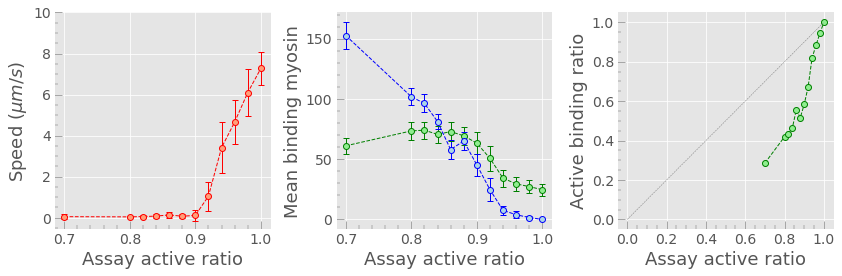

In [30]:
fig, ax = plt.subplots(1,3, figsize=(30*cm,10*cm), sharex=False)

#ax[0].errorbar(r,s['spd'],s['std'], capsize=3, linestyle='--', lw=1, color = 'gray', mec = 'red', marker='o',\
#             markerfacecolor='lightgray', ecolor='red', elinewidth=1, label='v11a')
#ax[0].errorbar(r_ATP500,s_ATP500['spd'],s_ATP500['std'], capsize=3, linestyle='--', lw=1, color = 'gray', mec = 'gray', marker='o',\
#              markerfacecolor='lightgrey', ecolor='gray', elinewidth=1, label='v11a')

ax[0].errorbar(r_77,s_77['spd'],s_77['std'], capsize=3, linestyle='--', lw=1, color = 'red', mec = 'red', marker='o',\
             markerfacecolor='lightsalmon', ecolor='red', elinewidth=1, label='v11a')

#ax[0].errorbar(r_273,s_273['spd'],s_273['std'], capsize=3, linestyle='--', lw=1, color = 'gray', mec = 'gray', marker='o',\
#             markerfacecolor='lightgrey', ecolor='gray', elinewidth=1, label='v11a')

#ax[0].errorbar(r_pN,s_pN['spd'],s_pN['std'], capsize=3, linestyle='--', lw=1, color = 'gray', mec = 'black', marker='o',\
#             markerfacecolor='lightgrey', ecolor='black', elinewidth=1, label='v11a')

#ax[0].plot([0.92,0.92],[0.1,9.0], linestyle='--', lw=0.5, color='gray')

#ax[0].fill_between(r,(s['spd']-s['std']),(s['spd']+s['std']), alpha=0.4, edgecolor='black', facecolor='#FF9848')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
#ax[0].spines['bottom'].set_position(('axes',-0.01))
#ax[0].spines['left'].set_position(('axes',-0.04))
#ax[0].spines['left'].set_bounds(0,10)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

#ax[0].set_xticks(np.arange(0.68,1.03,step=0.2))
ax[0].set_yticks(np.arange(0,10.3,2.0))

ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[0].set_xlabel('Assay active ratio', fontsize=18)
ax[0].set_ylabel('Speed ($\mu m/s$)', fontsize= 18)

#for x,y in zip(r,s['spd']):
#    label = "{:.1f}".format(y)
#    ax[0].annotate(label,(x,y),textcoords="offset points",xytext=(5,7),ha='right', color='blue')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

#ax[1].errorbar(r,ac_def['spec1'],ac_def['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='grey', ecolor='green', label='Active')
#ax[1].errorbar(r,ac_def['spec2'],ac_def['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='grey', ecolor='blue', label='Defective')
##ax[1].fill_between(r,(ac_def['spec2']-ac_def['dev2']),(ac_def['spec2']+ac_def['dev2']), alpha=0.4, edgecolor='blue', facecolor='#FF9848')
#ax[1].plot(r_77,dfw1, marker='o', markerfacecolor='gray', ls='--', color='grey', label='Def. F/k') # gray
#ax[1].plot(r_77,acw2, marker='o', markerfacecolor='gray', ls='--', color='grey', label='Def. F/k')

ax[1].errorbar(r_77,ac_def_77['spec1'],ac_def_77['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='lightgreen', ecolor='green', label='Active')
ax[1].errorbar(r_77,ac_def_77['spec2'],ac_def_77['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')

#ax[1].errorbar(r_ATP500,ac_def_ATP500['spec1'],ac_def_ATP500['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Active')
#ax[1].errorbar(r_ATP500,ac_def_ATP500['spec2'],ac_def_ATP500['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Defective')

#ax[1].errorbar(r_273,ac_def_273['spec1'],ac_def_273['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgreen', ecolor='gray', label='Active')
#ax[1].errorbar(r_273,ac_def_273['spec2'],ac_def_273['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightblue', ecolor='gray', label='Defective')

#ax[1].errorbar(r_pN,ac_def_pN['spec1'],ac_def_pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='yellow', ecolor='green', label='Active')
#ax[1].errorbar(r_pN,ac_def_pN['spec2'],ac_def_pN['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='blue', ecolor='blue', label='Defective')

#ax[1].plot([0.92,0.92],[0.1,149.0], linestyle='--', lw=0.5, color='gray')

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

#ax[1].spines['bottom'].set_position(('axes',-0.01))
#ax[1].spines['left'].set_position(('axes',-0.05))
#ax[1].spines['left'].set_bounds(0,180)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

#ax[1].set_xticks(np.arange(0.1,1.1,step=0.1))
#ax[1].set_yticks(np.arange(0,181,30))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[1].set_xlabel('Assay active ratio', fontsize=18)
ax[1].set_ylabel('Mean binding myosin', fontsize=18)
#================================================================================

act_r = ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2'])
def_r = ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2'])

act_r_77 = ac_def_77['spec1']/(ac_def_77['spec1'] + ac_def_77['spec2'])
def_r_77 = ac_def_77['spec2']/(ac_def_77['spec1'] + ac_def_77['spec2'])

act_r_ATP500 = ac_def_ATP500['spec1']/(ac_def_ATP500['spec1'] + ac_def_ATP500['spec2'])
def_r_ATP500 = ac_def_ATP500['spec2']/(ac_def_ATP500['spec1'] + ac_def_ATP500['spec2'])

act_r_273 = ac_def_273['spec1']/(ac_def_273['spec1'] + ac_def_273['spec2'])
def_r_273 = ac_def_273['spec2']/(ac_def_273['spec1'] + ac_def_273['spec2'])

act_r_pN = ac_def_pN['spec1']/(ac_def_pN['spec1'] + ac_def_pN['spec2'])
def_r_pN = ac_def_pN['spec2']/(ac_def_pN['spec1'] + ac_def_pN['spec2'])

#ax[2].plot(r,act_r, marker='o', markerfacecolor='lightgray', linestyle='--', lw=1, color = 'gray')
#ax[2].plot(r,def_r, marker='o', markerfacecolor='lightblue', linestyle='--', lw=1, color = 'blue')

#ax[2].plot(r_ATP500,act_r_ATP500, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
# #ax[2].plot(r_ATP500,def_r_ATP500, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

#ax[2].plot(r_273,act_r_273, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
#ax[2].plot(r_273,def_r_273, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

#ax[2].plot(r_pN,act_r_pN, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
#ax[2].plot(r_pN,def_r_pN, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

ax[2].plot(r_77,act_r_77, marker='o', markerfacecolor='lightgreen', linestyle='--', lw=1, color = 'green')
#ax[2].plot(r_77,def_r_77, marker='o', markerfacecolor='lightgreen', linestyle='--', lw=1, color = 'green')

#ax[2].plot([0.7,1.0],[0.5,0.5], linestyle='--', lw=0.5, color='gray')
#ax[2].plot([0.7,1.0],[0.67,0.67], linestyle='--', lw=0.5, color='gray')
#ax[2].plot([0.92,0.92],[0.1,0.9], linestyle='--', lw=0.5, color='gray')
#ax[2].plot([0.50,0.50],[0.1,0.9], linestyle='--', lw=0.5, color='gray')

# for x,y in zip(r,act_r):
#     label = "{:.2f}".format(y)
#     ax[2].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='green')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
# for x,y in zip(r_ATP500,act_r_ATP500):
#     label = "{:.2f}".format(y)
#     ax[2].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='gray')

r_ref = np.linspace(0.0,1,len(r_77))
ax[2].plot(r_ref,r_ref, linestyle='--', lw=0.5, color='gray')
ax[2].set_xticks(np.arange(0.0,1.1,step=0.2))
ax[2].set_yticks(np.arange(0.0,1.1,0.2))

ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

#ax[2].spines['bottom'].set_position(('axes',-0.05))
#ax[2].spines['left'].set_position(('axes',-0.05))
#ax[2].spines['left'].set_bounds(0,1)

ax[2].xaxis.set_ticks_position('bottom')
ax[2].yaxis.set_ticks_position('left')

#ax[2].set_xticks(np.arange(0.1,1.1,step=0.1))
#ax[2].set_yticks(np.arange(0,1.1,0.2))

ax[2].minorticks_on()
ax[2].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[2].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[2].set_xlabel('Assay active ratio', fontsize=18)
ax[2].set_ylabel('Active binding ratio', fontsize=18)

#fig.text(0.19,-0.01,'(a)', ha='center', fontsize= 16)
#fig.text(0.52,-0.01,'(b)', ha='center', fontsize= 16)
#fig.text(0.85,-0.01,'(c)', ha='center', fontsize= 16)

fig.tight_layout()
#plt.savefig('fig/speed_binding_R07_08t5ATP500.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_R07_08t5F4.6pN.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_R07_08t5F4.6pNMD.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_r0.7_1.0s77t5.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_r0.7_1.0s77t5ATP500.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_r0.7_1.0s273t5MD.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

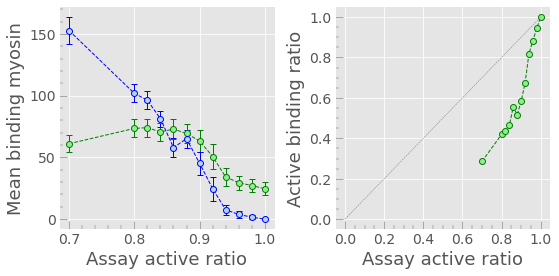

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20*cm,10*cm), sharex=False)


ax[0].errorbar(r_77,ac_def_77['spec1'],ac_def_77['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='lightgreen', ecolor='green', label='Active')
ax[0].errorbar(r_77,ac_def_77['spec2'],ac_def_77['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')

# ax[0].errorbar(r_ATP500,ac_def_ATP500['spec1'],ac_def_ATP500['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Active')
# ax[0].errorbar(r_ATP500,ac_def_ATP500['spec2'],ac_def_ATP500['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Defective')

#ax[0].errorbar(r_273,ac_def_273['spec1'],ac_def_273['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgreen', ecolor='gray', label='Active')
#ax[0].errorbar(r_273,ac_def_273['spec2'],ac_def_273['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightblue', ecolor='gray', label='Defective')

#ax[0].errorbar(r_pN,ac_def_pN['spec1'],ac_def_pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='yellow', ecolor='green', label='Active')
#ax[0].errorbar(r_pN,ac_def_pN['spec2'],ac_def_pN['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='blue', ecolor='blue', label='Defective')

#ax[0].plot([0.92,0.92],[0.1,149.0], linestyle='--', lw=0.5, color='gray')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#ax[0].spines['bottom'].set_position(('axes',-0.01))
#ax[0].spines['left'].set_position(('axes',-0.05))
#ax[0].spines['left'].set_bounds(0,180)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

#ax[0].set_xticks(np.arange(0.1,1.1,step=0.1))
#ax[0].set_yticks(np.arange(0,181,30))
#ax.set_ylim(ymin=0)

#ax[0].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[0].set_xlabel('Assay active ratio', fontsize=18)
ax[0].set_ylabel('Mean binding myosin', fontsize=18)
#================================================================================

act_r = ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2'])
def_r = ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2'])

act_r_77 = ac_def_77['spec1']/(ac_def_77['spec1'] + ac_def_77['spec2'])
def_r_77 = ac_def_77['spec2']/(ac_def_77['spec1'] + ac_def_77['spec2'])

act_r_ATP500 = ac_def_ATP500['spec1']/(ac_def_ATP500['spec1'] + ac_def_ATP500['spec2'])
def_r_ATP500 = ac_def_ATP500['spec2']/(ac_def_ATP500['spec1'] + ac_def_ATP500['spec2'])

act_r_273 = ac_def_273['spec1']/(ac_def_273['spec1'] + ac_def_273['spec2'])
def_r_273 = ac_def_273['spec2']/(ac_def_273['spec1'] + ac_def_273['spec2'])

act_r_pN = ac_def_pN['spec1']/(ac_def_pN['spec1'] + ac_def_pN['spec2'])
def_r_pN = ac_def_pN['spec2']/(ac_def_pN['spec1'] + ac_def_pN['spec2'])

#ax[1].plot(r,act_r, marker='o', markerfacecolor='lightgray', linestyle='--', lw=1, color = 'gray')
#ax[1].plot(r,def_r, marker='o', markerfacecolor='lightblue', linestyle='--', lw=1, color = 'blue')

# ax[1].plot(r_ATP500,act_r_ATP500, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
# #ax[1].plot(r_ATP500,def_r_ATP500, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

#ax[1].plot(r_273,act_r_273, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
#ax[1].plot(r_273,def_r_273, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

#ax[1].plot(r_pN,act_r_pN, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
#ax[1].plot(r_pN,def_r_pN, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

ax[1].plot(r_77,act_r_77, marker='o', markerfacecolor='lightgreen', linestyle='--', lw=1, color = 'green')
#ax[1].plot(r_77,def_r_77, marker='o', markerfacecolor='lightgreen', linestyle='--', lw=1, color = 'green')

r_ref = np.linspace(0.0,1,len(r_77))
ax[1].plot(r_ref,r_ref, linestyle='--', lw=0.5, color='gray')
ax[1].set_xticks(np.arange(0.0,1.1,step=0.2))
ax[1].set_yticks(np.arange(0.0,1.1,0.2))

#ax[1].plot([0.7,1.0],[0.5,0.5], linestyle='--', lw=0.5, color='gray')
#ax[1].plot([0.7,1.0],[0.67,0.67], linestyle='--', lw=0.5, color='gray')
#ax[1].plot([0.92,0.92],[0.1,0.9], linestyle='--', lw=0.5, color='gray')
#ax[1].plot([0.50,0.50],[0.1,0.9], linestyle='--', lw=0.5, color='gray')

# for x,y in zip(r,act_r):
#     label = "{:.2f}".format(y)
#     ax[1].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='green')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
# for x,y in zip(r_ATP500,act_r_ATP500):
#     label = "{:.2f}".format(y)
#     ax[1].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='gray')

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

#ax[1].spines['bottom'].set_position(('axes',-0.05))
#ax[1].spines['left'].set_position(('axes',-0.05))
#ax[1].spines['left'].set_bounds(0,1)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[1].set_xlabel('Assay active ratio', fontsize=18)
ax[1].set_ylabel('Active binding ratio', fontsize=18)

#fig.text(0.30,-0.01,'(a)', ha='center', fontsize= 16)
#fig.text(0.80,-0.01,'(b)', ha='center', fontsize= 16)

fig.tight_layout()

#plt.savefig('fig/BM_rto_v2.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto_v2.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto_v2.png', format='png', dpi=700, bbox_inches='tight')

plt.show()

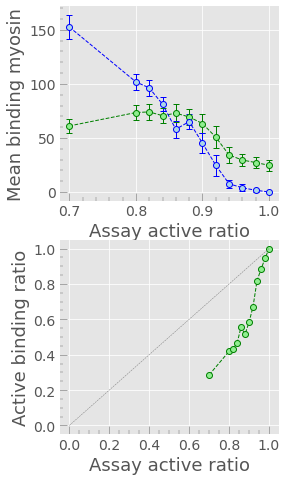

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10*cm,20*cm), sharex=False)


ax[0].errorbar(r_77,ac_def_77['spec1'],ac_def_77['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='lightgreen', ecolor='green', label='Active')
ax[0].errorbar(r_77,ac_def_77['spec2'],ac_def_77['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')

# ax[0].errorbar(r_ATP500,ac_def_ATP500['spec1'],ac_def_ATP500['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Active')
# ax[0].errorbar(r_ATP500,ac_def_ATP500['spec2'],ac_def_ATP500['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Defective')

#ax[0].errorbar(r_273,ac_def_273['spec1'],ac_def_273['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgreen', ecolor='gray', label='Active')
#ax[0].errorbar(r_273,ac_def_273['spec2'],ac_def_273['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightblue', ecolor='gray', label='Defective')

#ax[0].errorbar(r_pN,ac_def_pN['spec1'],ac_def_pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='yellow', ecolor='green', label='Active')
#ax[0].errorbar(r_pN,ac_def_pN['spec2'],ac_def_pN['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='blue', ecolor='blue', label='Defective')

#ax[0].plot([0.92,0.92],[0.1,149.0], linestyle='--', lw=0.5, color='gray')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

#ax[0].spines['bottom'].set_position(('axes',-0.01))
#ax[0].spines['left'].set_position(('axes',-0.05))
#ax[0].spines['left'].set_bounds(0,180)

ax[0].xaxis.set_ticks_position('bottom')
ax[0].yaxis.set_ticks_position('left')

#ax[0].set_xticks(np.arange(0.1,1.1,step=0.1))
#ax[0].set_yticks(np.arange(0,181,30))
#ax.set_ylim(ymin=0)

#ax[0].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax[0].minorticks_on()
ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[0].set_xlabel('Assay active ratio', fontsize=18)
ax[0].set_ylabel('Mean binding myosin', fontsize=18)
#================================================================================

act_r = ac_def['spec1']/(ac_def['spec1'] + ac_def['spec2'])
def_r = ac_def['spec2']/(ac_def['spec1'] + ac_def['spec2'])

act_r_77 = ac_def_77['spec1']/(ac_def_77['spec1'] + ac_def_77['spec2'])
def_r_77 = ac_def_77['spec2']/(ac_def_77['spec1'] + ac_def_77['spec2'])

act_r_ATP500 = ac_def_ATP500['spec1']/(ac_def_ATP500['spec1'] + ac_def_ATP500['spec2'])
def_r_ATP500 = ac_def_ATP500['spec2']/(ac_def_ATP500['spec1'] + ac_def_ATP500['spec2'])

act_r_273 = ac_def_273['spec1']/(ac_def_273['spec1'] + ac_def_273['spec2'])
def_r_273 = ac_def_273['spec2']/(ac_def_273['spec1'] + ac_def_273['spec2'])

act_r_pN = ac_def_pN['spec1']/(ac_def_pN['spec1'] + ac_def_pN['spec2'])
def_r_pN = ac_def_pN['spec2']/(ac_def_pN['spec1'] + ac_def_pN['spec2'])

#ax[1].plot(r,act_r, marker='o', markerfacecolor='lightgray', linestyle='--', lw=1, color = 'gray')
#ax[1].plot(r,def_r, marker='o', markerfacecolor='lightblue', linestyle='--', lw=1, color = 'blue')

# ax[1].plot(r_ATP500,act_r_ATP500, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
# #ax[1].plot(r_ATP500,def_r_ATP500, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

#ax[1].plot(r_273,act_r_273, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
#ax[1].plot(r_273,def_r_273, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

#ax[1].plot(r_pN,act_r_pN, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')
#ax[1].plot(r_pN,def_r_pN, marker='o', markerfacecolor='lightgrey', linestyle='--', lw=1, color = 'gray')

ax[1].plot(r_77,act_r_77, marker='o', markerfacecolor='lightgreen', linestyle='--', lw=1, color = 'green')
#ax[1].plot(r_77,def_r_77, marker='o', markerfacecolor='lightgreen', linestyle='--', lw=1, color = 'green')

r_ref = np.linspace(0.0,1,len(r_77))
ax[1].plot(r_ref,r_ref, linestyle='--', lw=0.5, color='gray')
ax[1].set_xticks(np.arange(0.0,1.1,step=0.2))
ax[1].set_yticks(np.arange(0.0,1.1,0.2))

#ax[1].plot([0.7,1.0],[0.5,0.5], linestyle='--', lw=0.5, color='gray')
#ax[1].plot([0.7,1.0],[0.67,0.67], linestyle='--', lw=0.5, color='gray')
#ax[1].plot([0.92,0.92],[0.1,0.9], linestyle='--', lw=0.5, color='gray')
#ax[1].plot([0.50,0.50],[0.1,0.9], linestyle='--', lw=0.5, color='gray')

# for x,y in zip(r,act_r):
#     label = "{:.2f}".format(y)
#     ax[1].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='green')
#    #https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
# for x,y in zip(r_ATP500,act_r_ATP500):
#     label = "{:.2f}".format(y)
#     ax[1].annotate(label,(x,y),textcoords="offset points",xytext=(4,8),ha='right', color='gray')

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

#ax[1].spines['bottom'].set_position(('axes',-0.05))
#ax[1].spines['left'].set_position(('axes',-0.05))
#ax[1].spines['left'].set_bounds(0,1)

ax[1].xaxis.set_ticks_position('bottom')
ax[1].yaxis.set_ticks_position('left')

ax[1].minorticks_on()
ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax[1].set_xlabel('Assay active ratio', fontsize=18)
ax[1].set_ylabel('Active binding ratio', fontsize=18)

#fig.text(0.30,-0.01,'(a)', ha='center', fontsize= 16)
#fig.text(0.80,-0.01,'(b)', ha='center', fontsize= 16)

#fig.tight_layout()

#plt.savefig('fig/BM_rto_v3.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto_v3.svg', format='svg', dpi=500, bbox_inches='tight')

plt.show()

In [8]:
import subprocess
subprocess.call('inkscape fig/BM_rto_v2.svg -M fig/BM_rto_v2.emf', shell=True)

0

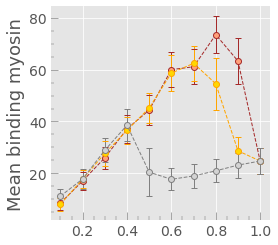

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharex=False)

# ar1 = np.array(ac_def_77_92pN['spec1'])
# ar2 = np.array(ac_def_77['spec1'])
# ac_def_77_sp1 = np.concatenate([ar1,ar2])

# ar3 = np.array(ac_def_77_92pN['spec2'])
# ar4 = np.array(ac_def_77['spec2'])
# ac_def_77_sp2 = np.concatenate([ar3,ar4])

# ar5 = np.array(ac_def_77_92pN['dev1'])
# ar6 = np.array(ac_def_77['dev1'])
# ac_def_77_dv1 = np.concatenate([ar5,ar6])

# ar7 = np.array(ac_def_77_92pN['dev2'])
# ar8 = np.array(ac_def_77['dev2'])
# ac_def_77_dv2 = np.concatenate([ar7,ar8])

# r_77_all = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0])

#ax[0].errorbar(r_77_all[4:],ac_def_77_sp2[4:],ac_def_77_dv2[4:], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')
#ax[0].errorbar(r_77_69pN[4:],ac_def_77_69pN['spec2'][4:],ac_def_77_69pN['dev2'][4:], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='brown', marker='o', markerfacecolor='orange', ecolor='blue', label='Defective')
#ax[0].errorbar(r_77_46pN[8:],ac_def_77_46pN['spec2'][8:],ac_def_77_46pN['dev2'][8:], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')


ax.errorbar(r_77_92pN,ac_def_77_92pN['spec1'],ac_def_77_92pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='brown', marker='o', markerfacecolor='lightsalmon', ecolor='brown', label='Active')
ax.errorbar(r_77_69pN,ac_def_77_69pN['spec1'],ac_def_77_69pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='orange', marker='o', markerfacecolor='gold', ecolor='orange', label='Active')
ax.errorbar(r_77_46pN,ac_def_77_46pN['spec1'],ac_def_77_46pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgray', ecolor='gray', label='Active')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

#ax[0].set_xlabel('Assay active ratio', fontsize=18)
ax.set_ylabel('Mean binding myosin', fontsize=18)
#================================================================================

# act_r_77_92pN = ac_def_77_92pN['spec1']/(ac_def_77_92pN['spec1']+ac_def_77_92pN['spec2'])
# act_r_77_69pN = ac_def_77_69pN['spec1']/(ac_def_77_69pN['spec1']+ac_def_77_69pN['spec2'])
# act_r_77_46pN = ac_def_77_46pN['spec1']/(ac_def_77_46pN['spec1']+ac_def_77_46pN['spec2'])


# ax[1].plot(r_77_92pN,act_r_77_92pN, marker='o', markerfacecolor='lightsalmon', linestyle='--', lw=1, color = 'brown')
# ax[1].plot(r_77_69pN,act_r_77_69pN, marker='o', markerfacecolor='gold', linestyle='--', lw=1, color = 'orange')
# ax[1].plot(r_77_46pN,act_r_77_46pN, marker='o', markerfacecolor='lightgray', linestyle='--', lw=1, color = 'gray')

# r_ref = np.linspace(0.0,1,len(r_77))
# ax[1].plot(r_ref,r_ref, linestyle='--', lw=0.5, color='gray')
# ax[1].set_xticks(np.arange(0.0,1.1,step=0.2))
# ax[1].set_yticks(np.arange(0.0,1.1,0.2))

# ax[1].spines['right'].set_visible(False)
# ax[1].spines['top'].set_visible(False)

# ax[1].xaxis.set_ticks_position('bottom')
# ax[1].yaxis.set_ticks_position('left')

# ax[1].minorticks_on()
# ax[1].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
# ax[1].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

# ax[1].set_xlabel('Assay active ratio', fontsize=18)
# ax[1].set_ylabel('Active binding ratio', fontsize=18)

#fig.text(0.30,-0.01,'(a)', ha='center', fontsize= 16)
#fig.text(0.80,-0.01,'(b)', ha='center', fontsize= 16)

#fig.tight_layout()

#plt.savefig('fig/BM_rto_dtchF_v2_1.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto_dtchF_v2_1.svg', format='svg', dpi=500, bbox_inches='tight')

plt.show()

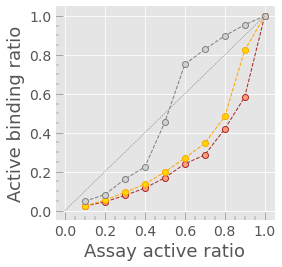

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharex=False)

# ar1 = np.array(ac_def_77_92pN['spec1'])
# ar2 = np.array(ac_def_77['spec1'])
# ac_def_77_sp1 = np.concatenate([ar1,ar2])

# ar3 = np.array(ac_def_77_92pN['spec2'])
# ar4 = np.array(ac_def_77['spec2'])
# ac_def_77_sp2 = np.concatenate([ar3,ar4])

# ar5 = np.array(ac_def_77_92pN['dev1'])
# ar6 = np.array(ac_def_77['dev1'])
# ac_def_77_dv1 = np.concatenate([ar5,ar6])

# ar7 = np.array(ac_def_77_92pN['dev2'])
# ar8 = np.array(ac_def_77['dev2'])
# ac_def_77_dv2 = np.concatenate([ar7,ar8])

# r_77_all = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94,0.96,0.98,1.0])

#ax[0].errorbar(r_77_all[4:],ac_def_77_sp2[4:],ac_def_77_dv2[4:], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')
#ax[0].errorbar(r_77_69pN[4:],ac_def_77_69pN['spec2'][4:],ac_def_77_69pN['dev2'][4:], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='brown', marker='o', markerfacecolor='orange', ecolor='blue', label='Defective')
#ax[0].errorbar(r_77_46pN[8:],ac_def_77_46pN['spec2'][8:],ac_def_77_46pN['dev2'][8:], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')


# ax[0].errorbar(r_77_92pN,ac_def_77_92pN['spec1'],ac_def_77_92pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='brown', marker='o', markerfacecolor='lightsalmon', ecolor='brown', label='Active')
# ax[0].errorbar(r_77_69pN,ac_def_77_69pN['spec1'],ac_def_77_69pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='orange', marker='o', markerfacecolor='gold', ecolor='orange', label='Active')
# ax[0].errorbar(r_77_46pN,ac_def_77_46pN['spec1'],ac_def_77_46pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgray', ecolor='gray', label='Active')

# ax[0].spines['right'].set_visible(False)
# ax[0].spines['top'].set_visible(False)


# ax[0].xaxis.set_ticks_position('bottom')
# ax[0].yaxis.set_ticks_position('left')

# ax[0].minorticks_on()
# ax[0].tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
# ax[0].tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

# #ax[0].set_xlabel('Assay active ratio', fontsize=18)
# ax[0].set_ylabel('Mean binding myosin', fontsize=18)
#================================================================================

act_r_77_92pN = ac_def_77_92pN['spec1']/(ac_def_77_92pN['spec1']+ac_def_77_92pN['spec2'])
act_r_77_69pN = ac_def_77_69pN['spec1']/(ac_def_77_69pN['spec1']+ac_def_77_69pN['spec2'])
act_r_77_46pN = ac_def_77_46pN['spec1']/(ac_def_77_46pN['spec1']+ac_def_77_46pN['spec2'])


ax.plot(r_77_92pN,act_r_77_92pN, marker='o', markerfacecolor='lightsalmon', linestyle='--', lw=1, color = 'brown')
ax.plot(r_77_69pN,act_r_77_69pN, marker='o', markerfacecolor='gold', linestyle='--', lw=1, color = 'orange')
ax.plot(r_77_46pN,act_r_77_46pN, marker='o', markerfacecolor='lightgray', linestyle='--', lw=1, color = 'gray')

r_ref = np.linspace(0.0,1,len(r_77))
ax.plot(r_ref,r_ref, linestyle='--', lw=0.5, color='gray')
ax.set_xticks(np.arange(0.0,1.1,step=0.2))
ax.set_yticks(np.arange(0.0,1.1,0.2))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('Assay active ratio', fontsize=18)
ax.set_ylabel('Active binding ratio', fontsize=18)

#fig.text(0.30,-0.01,'(a)', ha='center', fontsize= 16)
#fig.text(0.80,-0.01,'(b)', ha='center', fontsize= 16)

#fig.tight_layout()

#plt.savefig('fig/BM_rto_dtchF_v2_2.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto_dtchF_v2_2.svg', format='svg', dpi=500, bbox_inches='tight')

plt.show()

In [59]:
s_77_46pN_cln = pd.read_csv('data_12-05/spd_std77s5F4.6pN_cleaned.csv', names=['spd','std']) 
r_77_46pN_cln = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.80,0.90,1.0])

s_77_69pN = pd.read_csv('data_12-05/spd_std77s5F6.9pN.csv', names=['spd','std']) 
r_77_69pN = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.80,0.90,1.0])

s_77_92pN = pd.read_csv('data_12-05/spd_std77s5F9.2pN_combined.csv', names=['spd','std']) 
r_77_92pN = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.70,0.80,0.90,1.0])

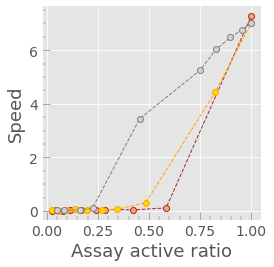

In [65]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharex=False)

#================================================================================

act_r_77_92pN = ac_def_77_92pN['spec1']/(ac_def_77_92pN['spec1']+ac_def_77_92pN['spec2'])
act_r_77_69pN = ac_def_77_69pN['spec1']/(ac_def_77_69pN['spec1']+ac_def_77_69pN['spec2'])
act_r_77_46pN = ac_def_77_46pN['spec1']/(ac_def_77_46pN['spec1']+ac_def_77_46pN['spec2'])


ax.plot(act_r_77_92pN, s_77_92pN['spd'], marker='o', markerfacecolor='lightsalmon', linestyle='--', lw=1, color = 'brown')
ax.plot(act_r_77_69pN, s_77_69pN['spd'], marker='o', markerfacecolor='gold', linestyle='--', lw=1, color = 'orange')
ax.plot(act_r_77_46pN, s_77_46pN_cln['spd'], marker='o', markerfacecolor='lightgray', linestyle='--', lw=1, color = 'gray')

#r_ref = np.linspace(0.0,1,len(r_77))
#ax.plot(r_ref,r_ref, linestyle='--', lw=0.5, color='gray')

#ax.set_xticks(np.arange(0.0,1.1,step=0.2))
#ax.set_yticks(np.arange(0.0,1.1,0.2))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('Assay active ratio', fontsize=18)
ax.set_ylabel('Speed', fontsize=18)

#fig.text(0.30,-0.01,'(a)', ha='center', fontsize= 16)
#fig.text(0.80,-0.01,'(b)', ha='center', fontsize= 16)

#fig.tight_layout()

#plt.savefig('fig/BM_rto_dtchF_v2.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto_dtchF_v2.svg', format='svg', dpi=500, bbox_inches='tight')

plt.show()

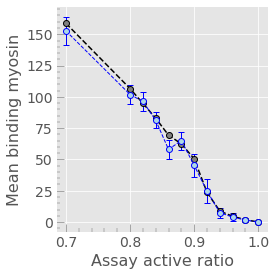

In [64]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm), sharex=False)


#ax.errorbar(r_77,ac_def_77['spec1'],ac_def_77['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='lightgreen', ecolor='green', label='Active')
ax.errorbar(r_77,ac_def_77['spec2'],ac_def_77['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='blue', marker='o', markerfacecolor='lightblue', ecolor='blue', label='Defective')

# ax[0].errorbar(r_ATP500,ac_def_ATP500['spec1'],ac_def_ATP500['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Active')
# ax[0].errorbar(r_ATP500,ac_def_ATP500['spec2'],ac_def_ATP500['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='gray', label='Defective')

#ax.errorbar(r_273,ac_def_273['spec1'],ac_def_273['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgreen', ecolor='gray', label='Active')
#ax.errorbar(r_273,ac_def_273['spec2'],ac_def_273['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightblue', ecolor='gray', label='Defective')

#ax[0].errorbar(r_pN,ac_def_pN['spec1'],ac_def_pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='yellow', ecolor='green', label='Active')
#ax[0].errorbar(r_pN,ac_def_pN['spec2'],ac_def_pN['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='blue', ecolor='blue', label='Defective')

ax.plot(r_77,dfw1, marker='o', markerfacecolor='gray', ls='--', color='black', label='Def. F/k') # gray
#ax.plot(r_273,dfw1_MD2000, marker='o', markerfacecolor='gray', ls='--', color='black', label='Def. F/k')

#ax[0].plot([0.92,0.92],[0.1,149.0], linestyle='--', lw=0.5, color='gray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax[0].spines['bottom'].set_position(('axes',-0.01))
#ax[0].spines['left'].set_position(('axes',-0.05))
#ax[0].spines['left'].set_bounds(0,180)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#ax[0].set_xticks(np.arange(0.1,1.1,step=0.1))
#ax[0].set_yticks(np.arange(0,181,30))
#ax.set_ylim(ymin=0)

#ax[0].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('Assay active ratio', fontsize=16)
ax.set_ylabel('Mean binding myosin', fontsize=16)
#================================================================================

fig.tight_layout()

#plt.savefig('fig/BM_pred.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_pred_MD2000.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()

In [47]:
!pdfjam --nup 2x1 --papersize '{20cm,10cm}' fig/BM_rto_pred.pdf fig/BM_rto_pred_MD2000.pdf --outfile fig/BM_rto_pred_MD3000_2000.pdf

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /usr/bin/pdfjam --nup '2x1' --papersize '{20cm,10cm}' --outfile fig/BM_rto_pred_MD3000_2000.pdf -- fig/BM_rto_pred.pdf - fig/BM_rto_pred_MD2000.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'fig/BM_rto_pred_MD3000_2000.pdf'.


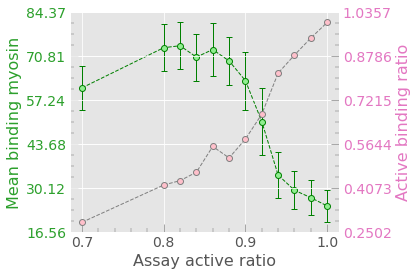

In [29]:
fig, ax1 = plt.subplots(figsize=(15*cm,10*cm))
pts = 6

color = 'tab:green'
ax1.set_xlabel('Assay active ratio', fontsize= 16)
ax1.set_ylabel('Mean binding myosin', fontsize= 16, color=color)
ax1.errorbar(r_77,ac_def_77['spec1'],ac_def_77['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='green', marker='o', markerfacecolor='lightgreen', ecolor='green', label='Active')
ax1.tick_params(axis='y', labelcolor=color)
ax1.minorticks_on()
ax1.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax1.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax1.set_yticks(np.linspace(*ax1.get_ybound(), pts))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:pink'
ax2.set_ylabel('Active binding ratio', fontsize= 16, color=color)  # we already handled the x-label with ax1
ax2.plot(r_77,act_r_77, marker='o', markerfacecolor='pink', linestyle='--', lw=1, color = 'grey')
ax2.tick_params(axis='y', labelcolor=color)
ax2.minorticks_on()
ax2.tick_params('both',direction='in',top=False,right=True,length=8, width=0.5,which='major', labelsize=14)
ax2.tick_params('both',direction='in',top=False,right=True,length=4, width=0.4,which='minor', labelsize=14)

ax2.set_yticks(np.linspace(*ax2.get_ybound(), pts))

#fig.text(0.5,-0.01,'(a)', ha='center', fontsize= 16)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.savefig('fig/BM_rto.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('fig/BM_rto.pdf', format='pdf', dpi=500, bbox_inches='tight')

plt.show()

In [83]:
import subprocess
subprocess.call('inkscape fig/BM_rto.svg -M fig/BM_rto.emf', shell=True)

0

In [88]:
#!pdfjam --nup 2x1 --papersize '{30cm,10cm}' fig/BM_rto.pdf fig/lyf_tym_cmpr.pdf --outfile fig/BM_rto_lyf_cmpr.pdf

          ----
  pdfjam: This is pdfjam version 2.08.
  pdfjam: Reading any site-wide or user-specific defaults...
          (none found)
  pdfjam: Effective call for this run of pdfjam:
          /usr/bin/pdfjam --nup '2x1' --papersize '{30cm,10cm}' --outfile fig/BM_rto_lyf_cmpr.pdf -- fig/BM_rto.pdf - fig/lyf_tym_cmpr.pdf - 
  pdfjam: Calling pdflatex...
  pdfjam: Finished.  Output was to 'fig/BM_rto_lyf_cmpr.pdf'.


In [69]:
np.round(np.linspace(*ax2.get_ybound(), pts),1)

array([0.3, 0.4, 0.6, 0.7, 0.9, 1. ])

In [11]:
!jupyter nbconvert 22-02-2021_R0.7_spdBMkd0_v11n.ipynb --no-input --to html

[NbConvertApp] Converting notebook V11nBMotors_Speed_dt1s5kd0.ipynb to html
[NbConvertApp] Writing 656624 bytes to V11nBMotors_Speed_dt1s5kd0.html
